In [1]:
import pandas as pd
import joblib
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import median_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


data = pd.read_csv('data_analyst_salary_2025.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_surv     1422 non-null   int64  
 1   Column1          1422 non-null   int64  
 2   job_location     1406 non-null   object 
 3   company_type     1421 non-null   object 
 4   is_manager       1406 non-null   object 
 5   is_python        823 non-null    object 
 6   is_data_analyst  1422 non-null   object 
 7   is_ml            1406 non-null   object 
 8   is_sql           1406 non-null   object 
 9   is_full_time     1329 non-null   object 
 10  viz_tool         1349 non-null   object 
 11  exp              1406 non-null   float64
 12  salary           1310 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 144.6+ KB


In [2]:
data.salary.describe()


count     1310.000000
mean     19795.920611
std       8449.786838
min          0.000000
25%      14000.000000
50%      19000.000000
75%      25000.000000
max      70000.000000
Name: salary, dtype: float64

### drop unnecessary data

In [3]:
# drop if no salary
data.dropna(subset=['salary'], inplace=True)



In [4]:
# Find extrame sample
z_scores = stats.zscore(data['salary'])
abs_z_scores = abs(z_scores)

# Define the condition for outliers
outliers = abs_z_scores > 3

df_filtered = data[outliers]
df_filtered

,year_of_surv,Column1,job_location,company_type,is_manager,is_python,is_data_analyst,is_ml,is_sql,is_full_time,viz_tool,exp,salary
66,2022,67,מרכז,הייטק (גלובלי),כן,כן,כן,לא,כן,מלאה,Other,20.0,70000.0
1115,2024,1116,צפון,תעשייה ישראלית,כן,לא,כן,לא,כן,מלאה,Power BI,2.0,70000.0
1162,2024,1163,אזור תל אביב,הייטק,כן,לא,כן,כן,כן,מלאה,Power BI,10.0,65000.0
1208,2024,1209,אזור תל אביב,הייטק,כן,לעיתים נדירות,כן,לעיתים נדירות,כן,מלאה,Tableau,11.0,48000.0
1210,2025,1211,אזור תל אביב,הייטק (גלובלי),לא,כן,כן,לעיתים נדירות,כן,מלאה,Python/R,2.0,70000.0


In [5]:
data.sort_values(by='salary', ascending=True, inplace=True)
data[:20]

,year_of_surv,Column1,job_location,company_type,is_manager,is_python,is_data_analyst,is_ml,is_sql,is_full_time,viz_tool,exp,salary
600,2021,601,מרכז,הייטק,לא,NaN,כן,לא,כן,חצי משרה,Redash,0.8,0.0
633,2021,634,מרכז,הייטק,לא,NaN,כן,לא,כן,מלאה,Power BI,5.0,0.0
603,2021,604,אזור תל אביב,הייטק,לא,NaN,כן,כן,כן,מלאה,Looker/Google Data studio,4.0,0.0
811,2021,812,מרכז,אחר,כן,NaN,כן,לעיתים נדירות,כן,חצי משרה,Qlik,10.0,0.0
568,2021,569,מרכז,הייטק (גלובלי),לא,NaN,כן,לא,לא,מלאה,Tableau,8.0,0.0
662,2021,663,אזור תל אביב,הייטק (גלובלי),לא,NaN,כן,לא,כן,מלאה,Looker/Google Data studio,10.0,0.0
541,2021,542,מרכז,הייטק (גלובלי),לא,NaN,כן,לא,כן,מלאה,Other,0.0,0.0
563,2021,564,מרכז,צהל,לא,NaN,כן,לעיתים נדירות,לעיתים נדירות,מלאה,Power BI,3.0,0.0
401,2020,402,מרכז,תעשייה ישראלית,כן,NaN,כן,כן,כן,מלאה,Power BI,13.0,0.0
365,2020,366,אזור תל אביב,הייטק,כן,NaN,כן,כן,כן,מלאה,Power BI,10.0,0.0


In [6]:
# droping outliers
data=data[data.salary>=8000]
data=data[data.salary<=50000]
data.salary.describe()


count     1232.000000
mean     20516.360390
std       7363.366886
min       8000.000000
25%      15000.000000
50%      19500.000000
75%      25000.000000
max      48000.000000
Name: salary, dtype: float64

### Analyzing categorical features

In [7]:
for column in data.columns:
    # Check if the column is of object type
    if data[column].dtype == 'object':
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")  # Print a new line for readability between columns

Value counts for job_location:
job_location
אזור תל אביב    631
מרכז            414
אזור ירושלים     59
אזור חיפה        32
צפון             29
עבודה מהבית      28
אזור השפלה       21
דרום             10
אזור באר שבע      8
Name: count, dtype: int64


Value counts for company_type:
company_type
הייטק             496
תעשייה ישראלית    363
הייטק (גלובלי)    291
אחר                41
צהל                21
ממשלתיח            20
Name: count, dtype: int64


Value counts for is_manager:
is_manager
לא    999
כן    233
Name: count, dtype: int64


Value counts for is_python:
is_python
לא               362
כן               237
לעיתים נדירות    145
Name: count, dtype: int64


Value counts for is_data_analyst:
is_data_analyst
כן    1232
Name: count, dtype: int64


Value counts for is_ml:
is_ml
לא               746
לעיתים נדירות    272
כן               214
Name: count, dtype: int64


Value counts for is_sql:
is_sql
כן               972
לא               168
לעיתים נדירות     92
Name: count, dtype: in

In [8]:
# keeping only emplyees
# data= data.loc[data['job_type'].isin(['שכירה', 'שכיר'])]
# data.drop(columns=['job_type'], inplace=True)

# droping column- all "yes" 
data = data.drop(columns=['is_data_analyst'])

#keeping only full time
data = data[data['is_full_time'] == 'מלאה']
data.drop(columns=['is_full_time'], inplace=True)


# grouping 
data.loc[data['job_location'].isin(['צפון','דרום','אזור חיפה','אזור ירושלים','אזור באר שבע', 'אזור השפלה']), 'job_location'] = 'שאר הארץ'
# data.loc[data['analyst_type'].isin(['Web Analyst', 'Fraud Analyst','All kind of data analysis','Product','Business analyst']), 'analyst_type'] = 'Business/Data analyst' 
data.loc[data['company_type'].isin(['צהל', 'ממשלתיח']), 'company_type'] = 'אחר'
data.loc[data['company_type'].isin(['הייטק (גלובלי)']), 'company_type'] = 'הייטק'
# data['education'] = data['education'].fillna('אחר')
# data.loc[data['education'].isin(['מנהל עסקים','חשבונאות','כלכלה','כלכלה / פיננסים / חשבונאות']), 'education'] = 'כלכלה / פיננסים / חשבונאות/מנהל עסקים'
# data.loc[data['education'].isin(['מדעי הטבע','מדעי המחשב']), 'education'] = 'מדעים מדויקים'
# data.loc[data['education'].isin(['הנדסת תעשיה וניהול','מערכות מידע']), 'education'] = 'הנדסה תעשיה וניהול/ מערכות מידע'
data.loc[data['viz_tool'].isin(['Redash','Google Data studio','1','Mixpanel','Grafana','no_data','other']), 'viz_tool'] = 'Other'
data.loc[data['viz_tool'].isin(['Looker','Qlik','Python/R']), 'viz_tool'] = 'Looker/Qlik/Python/R'
data['is_python'].fillna(data['is_ml'], inplace=True)






In [9]:
for column in data.columns:
    # Check if the column is of object type
    if data[column].dtype == 'object':
        print(f"Value counts for {column}:")
        print(data[column].value_counts())
        print("\n")  # Print a new line for readability between columns

Value counts for job_location:
job_location
אזור תל אביב    612
מרכז            402
שאר הארץ        153
עבודה מהבית      26
Name: count, dtype: int64


Value counts for company_type:
company_type
הייטק             757
תעשייה ישראלית    360
אחר                76
Name: count, dtype: int64


Value counts for is_manager:
is_manager
לא    967
כן    226
Name: count, dtype: int64


Value counts for is_python:
is_python
לא               624
כן               330
לעיתים נדירות    239
Name: count, dtype: int64


Value counts for is_ml:
is_ml
לא               721
לעיתים נדירות    263
כן               209
Name: count, dtype: int64


Value counts for is_sql:
is_sql
כן               943
לא               161
לעיתים נדירות     89
Name: count, dtype: int64


Value counts for viz_tool:
viz_tool
Tableau                      376
Power BI                     236
Excel                        193
Looker/Qlik/Python/R         125
Other                         97
Looker/Google Data studio     95
Company Inside 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 1124 to 1208
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_of_surv  1193 non-null   int64  
 1   Column1       1193 non-null   int64  
 2   job_location  1193 non-null   object 
 3   company_type  1193 non-null   object 
 4   is_manager    1193 non-null   object 
 5   is_python     1193 non-null   object 
 6   is_ml         1193 non-null   object 
 7   is_sql        1193 non-null   object 
 8   viz_tool      1146 non-null   object 
 9   exp           1193 non-null   float64
 10  salary        1193 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 111.8+ KB


In [11]:
class YearToCategoryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Assuming X is a DataFrame for simplicity
        self.feature_names_out_ = X.columns.tolist()  # Capture input feature names
        return self
    
    def transform(self, X, y=None):
        # Transform logic here (your existing transformation code)
        # Example transformation:
        transformed_X = np.digitize(X, bins=[2020, 2021, 2022, 2024])
        return transformed_X

    def get_feature_names_out(self, input_features=None):
        # Return the output feature names
        return self.feature_names_out_

### testing different models

In [12]:


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load your data
# Assuming data is already loaded and stored in the variable 'data'

# Drop unnecessary columns and convert 'year_of_surv' to a string
data['year_of_surv_str'] = data['year_of_surv'].astype(str)
col=['company_type','is_manager','is_sql','is_python','year_of_surv','exp','viz_tool','job_location']
col=['company_type','is_manager','is_sql','is_python','year_of_surv','exp','viz_tool'
    ]

# Identify categorical and numerical columns
categorical_cols = data[col].select_dtypes(include=['object']).columns.tolist()
numerical_cols = ['exp']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols),
        ('year_custom', YearToCategoryTransformer(), ['year_of_surv'])  # Apply custom transformation to 'year'

    ])

# Split the data
X = data.drop('salary', axis=1)
X = data[col]
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=2, random_state=42),
    "XGBRegressor": XGBRegressor(n_estimators=100, max_depth=2, random_state=42),
}

# Perform K-fold cross-validation and print results
for name, model in models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define K-fold cross-validation
    scores = cross_val_score(model, X_train_preprocessed, y_train, scoring='neg_mean_absolute_error', cv=cv)
    model.fit(X_train_preprocessed, y_train)
    y_test_pred = model.predict(X_test_preprocessed)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    y_train_pred = model.predict(X_train_preprocessed)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    print(f"{name} Cross-validated MAE: {int(-scores.mean())} - Train MAE: {int(train_mae)} - Test MAE: {int(test_mae)} Test MAPE: {int(test_mape)}")


Linear Regression Cross-validated MAE: 3682 - Train MAE: 3617 - Test MAE: 3729 Test MAPE: 20
Random Forest Cross-validated MAE: 3876 - Train MAE: 3767 - Test MAE: 4092 Test MAPE: 21
Gradient Boosting Cross-validated MAE: 3433 - Train MAE: 3156 - Test MAE: 3590 Test MAPE: 19
XGBRegressor Cross-validated MAE: 3529 - Train MAE: 3037 - Test MAE: 3516 Test MAPE: 19


### finding best parmeters for Gradient Boosting

In [13]:



# Example parameter grid
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [2,3,4,5]
}


# Initialize the estimator
gbr = XGBRegressor(random_state=42)
# GradientBoostingRegressor(random_state=42)

    
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit it to your data
grid_search.fit(X_train_preprocessed, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_preprocessed)
y_train_pred = best_model.predict(X_train_preprocessed)



test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
medae = median_absolute_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
medae = median_absolute_error(y_train, y_train_pred)

print(f"{'GradientBoost'} Cross-validated MAE: {int(-grid_search.best_score_.mean())} - Train MAE: {int(train_mae)} - Test MAE: {int(test_mae)} Test MAPE: {int(test_mape)}")





/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
GradientBoost Cross-validated MAE: 3434 - Train MAE: 3172 - Test MAE: 3573 Test MAPE: 19


/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/danielr/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples

###  feature_importance

In [14]:
dic={
 'cat__company_type_אחר': 'company_type_Other',
 'cat__company_type_הייטק': 'company_type_Hi-tech',
 'cat__company_type_תעשייה ישראלית': 'company_type_Israeli Industry',
 'cat__is_manager_כן': 'is_manager_Yes',
 'cat__is_manager_לא': 'is_manager_No',
 'cat__is_sql_כן': 'is_sql_Yes',
 'cat__is_sql_לא': 'is_sql_No',
 'cat__is_sql_לעיתים נדירות': 'is_sql_Rarely',
 'cat__is_python_כן': 'is_python_Yes',
 'cat__is_python_לא': 'is_python_No',
 'cat__is_python_לעיתים נדירות': 'is_python_Rarely',
 'cat__year_of_surv_2020': 'year_of_surv_2020',
 'cat__year_of_surv_2021': 'year_of_surv_2021',
 'cat__year_of_surv_2022': 'year_of_surv_2022',
 'cat__year_of_surv_2024': 'year_of_surv_2024',
 'cat__viz_tool_Excel': 'viz_tool_Excel',
 'cat__viz_tool_Looker/Qlik/Python/R': 'viz_tool_Looker/Qlik/Python/R',
 'cat__viz_tool_Other': 'viz_tool_Other',
 'cat__viz_tool_Power BI': 'viz_tool_Power BI',
 'cat__viz_tool_Tableau': 'viz_tool_Tableau',
 'cat__viz_tool_other': 'viz_tool_other',
 'cat__viz_tool_No Tool': 'viz_tool_No_Tool',

 'cat__analyst_type_BI': 'analyst_type_BI',
 'cat__analyst_type_Business/Data analyst': 'analyst_type_Business/Data analyst',
 'cat__analyst_type_Data sceintist': 'analyst_type_Data sceintist',
 'cat__analyst_type_Financial Analyst': 'analyst_type_Financial Analyst',
 'cat__analyst_type_Marketing': 'analyst_type_Marketing',
 'cat__analyst_type_other': 'analyst_type_other',
 'num__exp': 'num__exp'
}


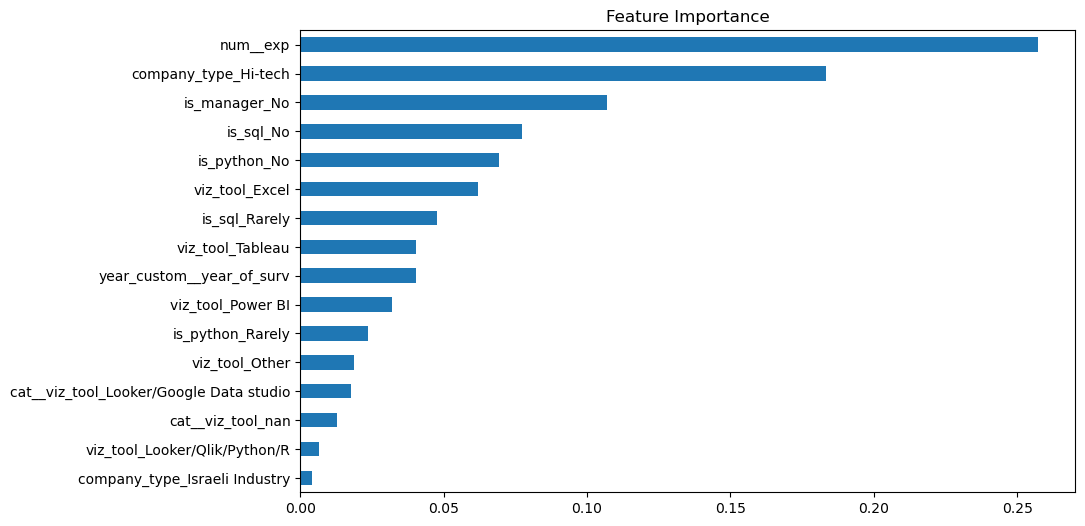

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming xgboost_adjusted is your trained XGBRegressor model
importances = best_model.feature_importances_

# Assuming you have the feature names accessible
# For example, if you used a ColumnTransformer with one-hot encoding,
# you might need to get the output feature names like so:
feature_names = preprocessor.get_feature_names_out()

feature_names_new=[]
for feature in feature_names:
    if feature in dic:
        feature_names_new.append(dic[feature])
    else:
        feature_names_new.append(feature)


# Create a pandas Series for easy plotting
feature_importance_original = pd.Series(importances, index=feature_names)
feature_importance_series = pd.Series(importances, index=feature_names_new)

# Plotting
feature_importance_series.sort_values(ascending=True).plot.barh(figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

### Trying to run the model with less features (didnt work)

In [16]:
from scipy.sparse import csr_matrix

def change_to_df(data_to_change,features,count):
    top_x_features = features.sort_values(ascending=False).head(count)
    top_x_features = top_x_features.index.tolist()
# If data_to_change is a sparse matrix
    if isinstance(data_to_change, csr_matrix):
        X_train_preprocessed_df = pd.DataFrame(data_to_change.toarray(), columns=feature_names)
    else:
        X_train_preprocessed_df = pd.DataFrame(data_to_change, columns=feature_names)

    return X_train_preprocessed_df[top_x_features]

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.metrics import median_absolute_error


# Example parameter grid

# Initialize the estimator


for count in [10,12,14,15,16,18,20,24,26,28,30]:

    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    X_train_preprocessed=change_to_df(X_train_preprocessed,feature_importance_original,count)
    X_test_preprocessed = change_to_df(X_test_preprocessed,feature_importance_original,count)


    gbr = GradientBoostingRegressor(random_state=42,
                                    learning_rate= 0.1,
                                    max_depth= 2, 
                                    min_samples_leaf= 4, 
                                    min_samples_split= 2, 
                                    n_estimators= 100)


    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define K-fold cross-validation
    scores = cross_val_score(gbr, X_train_preprocessed, y_train, scoring='neg_mean_absolute_error', cv=cv)    
    gbr.fit(X_train_preprocessed, y_train)
    y_test_pred = gbr.predict(X_test_preprocessed)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    y_train_pred = gbr.predict(X_train_preprocessed)
    train_mae = mean_absolute_error(y_train, y_train_pred)


    print(f"{count} features - Cross-validated MAE: {int(-scores.mean())} - Train MAE: {int(train_mae)} - Test MAE: {int(test_mae)} Test MAPE: {int(test_mape)}")



predictions = {'Results': y_test, 'Predictions': y_test_pred}

# Combine predictions into a DataFrame
predictions_df = pd.DataFrame(predictions)


10 features - Cross-validated MAE: 3460 - Train MAE: 3220 - Test MAE: 3545 Test MAPE: 19
12 features - Cross-validated MAE: 3435 - Train MAE: 3176 - Test MAE: 3551 Test MAPE: 19
14 features - Cross-validated MAE: 3428 - Train MAE: 3176 - Test MAE: 3552 Test MAPE: 19
15 features - Cross-validated MAE: 3430 - Train MAE: 3176 - Test MAE: 3564 Test MAPE: 19
16 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19
18 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19
20 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19
24 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19
26 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19
28 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19
30 features - Cross-validated MAE: 3431 - Train MAE: 3169 - Test MAE: 3553 Test MAPE: 19


### final result

In [18]:
X_all_data_preprocessed=preprocessor.fit_transform(X)
gbr.fit(X_all_data_preprocessed,y)
y_pred = gbr.predict(X_all_data_preprocessed)

test_mae = mean_absolute_error(y, y_pred)
test_mape = mean_absolute_percentage_error(y, y_pred)

print(f"MAE: {int(test_mae)} MAPE: {int(test_mape)}")
joblib.dump(gbr,'gradient_boosting_regressor_model.pkl')
joblib.dump(preprocessor, 'preprocessor.joblib')


MAE: 3213 MAPE: 16


['preprocessor.joblib']